# __Stemming and Lemmatization__
## __Stemming__, as the name represents, finds the stem of a word. Example, stem of 'going' is 'go'. In stemming, the base form of a word is identified by chopping the word.

## __Lemmatization__ is also used for the same purpose but it is more accurate than stemming. Example: If the word ‘go’ is in its past tense ‘went’ in the given sentence, Stemming cant arrive at 'go' from 'went'. But Lemmatization can. Stemming is a rule based technique where Lemmatization is a dictionary based technique. Therefore, Lemmatization is more accurate on the other hand it is slow in processing as it has to look up the dictionary. The base form of a word in this case is called Lemma.

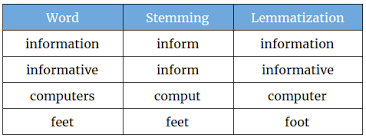

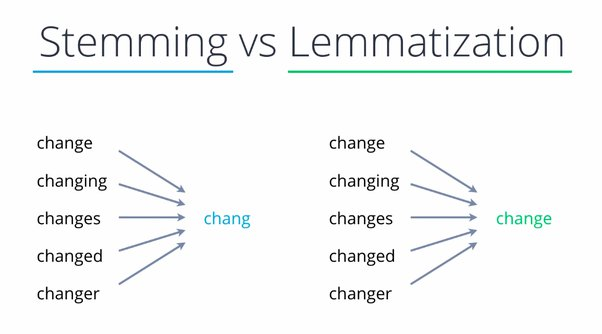

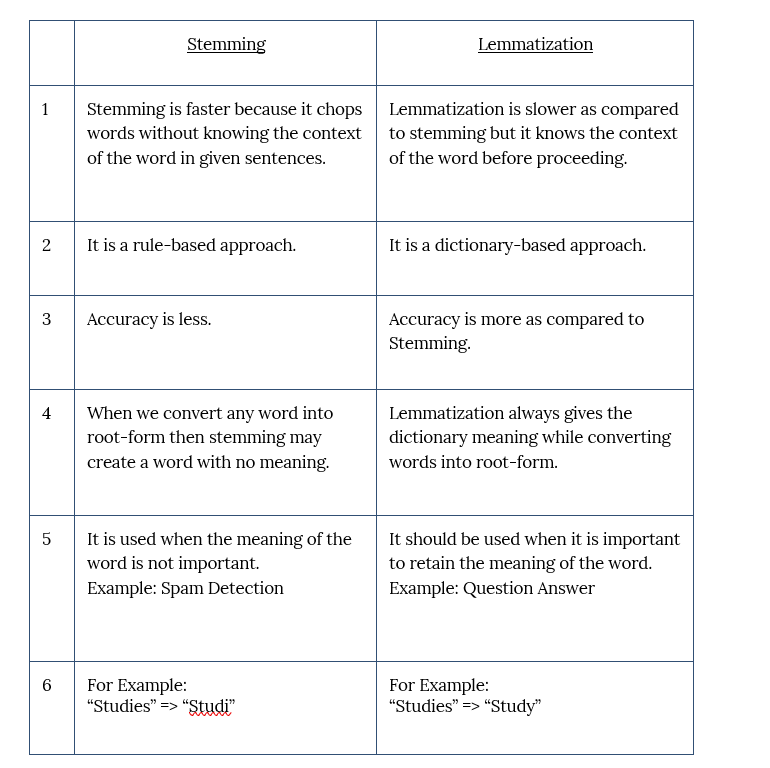

In [1]:
import nltk
import spacy

In [2]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# Here, we are creating an object called 'stemmer' of 'PorterStemmer()' class

In [3]:
words = ["eating", "eats", "ate", "eat", "adjustable", "crafting", "playing", "ability", "meeting"]

for word in words:
  print(word, " | ", stemmer.stem(word)) 

eating  |  eat
eats  |  eat
ate  |  ate
eat  |  eat
adjustable  |  adjust
crafting  |  craft
playing  |  play
ability  |  abil
meeting  |  meet


## Here, we can see it's printing the base word using stemming process. And also we can see 'ate' remains 'ate' and 'abil' remains 'abil', because __stemmer__ does'nt have the knowledge of a word, it just print the base word.

## Although, we can say it is dumb but it is faster in processing. That's why __stemming__ is also often used in NLP applications.

In [5]:
nlp = spacy.load("en_core_web_sm") # English small version of pipeline

doc = nlp("eating eats ate eat adjustable crafting playing ability meeting better")

for token in doc:
  print(token, " | ", token.lemma_)

eating  |  eating
eats  |  eat
ate  |  eat
eat  |  eat
adjustable  |  adjustable
crafting  |  craft
playing  |  playing
ability  |  ability
meeting  |  meeting
better  |  well


## Here, we can identify the difference between the __spacy__ and __nltk__ libraries in terms of __Stemming__ process.
## 'better' is converted to 'well'; few words remains unchanged because of inbuilt __spacy__ rules.

In [6]:
nlp = spacy.load("en_core_web_sm") # English small version of pipeline

doc = nlp("eating eats ate eat adjustable crafting playing ability meeting better")

for token in doc:
  print(token, " | ", token.lemma_, token.lemma)

eating  |  eating 12092082220177030354
eats  |  eat 9837207709914848172
ate  |  eat 9837207709914848172
eat  |  eat 9837207709914848172
adjustable  |  adjustable 6033511944150694480
crafting  |  craft 2176041286380181431
playing  |  playing 13803694918078379268
ability  |  ability 11565809527369121409
meeting  |  meeting 14798207169164081740
better  |  well 4525988469032889948


## Here, we can see the difference between 'lemma_' and 'lemma' where only __lemma__ gives us the unique hash or unique number associated for distinguish purposes.

In [8]:
nlp = spacy.load("en_core_web_sm") # English small version of pipeline

doc = nlp("Leo talked for 3 hours although talking isn't his thing he became talkative")

for token in doc:
  print(token, " | ", token.lemma_, token.lemma)

Leo  |  Leo 484757640389534734
talked  |  talk 13939146775466599234
for  |  for 16037325823156266367
3  |  3 602994839685422785
hours  |  hour 9748623380567160636
although  |  although 343236316598008647
talking  |  talking 3577425109143670181
is  |  be 10382539506755952630
n't  |  not 447765159362469301
his  |  his 2661093235354845946
thing  |  thing 2473243759842082748
he  |  he 1655312771067108281
became  |  become 12558846041070486771
talkative  |  talkative 13364764166055324990


In [9]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [10]:
doc = nlp("Bro, you wanna go? Brah, don't say NO! I am exhausted")

for token in doc:
  print(token.text, " | ", token.lemma_)

Bro  |  Bro
,  |  ,
you  |  you
wanna  |  wanna
go  |  go
?  |  ?
Brah  |  Brah
,  |  ,
do  |  do
n't  |  not
say  |  say
NO  |  no
!  |  !
I  |  I
am  |  be
exhausted  |  exhaust


## Here, as we know that 'Bro' & 'Brah' means 'Brother' anyhow but it's not indicating in the output. So, we need to customize it to 'Brother'. So need to call 'attribute_ruler'.

In [13]:
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT": "Bro"}], [{"TEXT": "Brah"}]], {"LEMMA": "Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say NO! I am exhausted.")

for token in doc:
  print(token.text, " | ", token.lemma_)


Bro  |  Brother
,  |  ,
you  |  you
wanna  |  wanna
go  |  go
?  |  ?
Brah  |  Brother
,  |  ,
do  |  do
n't  |  not
say  |  say
NO  |  no
!  |  !
I  |  I
am  |  be
exhausted  |  exhaust
.  |  .


## Now we can see 'Bro' and 'Brah' is 'Brother'